# **编码与哑变量**

在机器学习中，大多数算法等都只能够处理数值型数据，不能处理文字。在sklearn当中，除了专用来处理文字的算法，其他算法在fit的时候全部要求输入数组或矩阵，也不能够导入文字型数据（其实手写决策树和朴素贝叶斯可以处理文字，但是sklearn中规定必须导入数值型）

然而在现实中，许多标签和特征在数据收集完毕的时候，都不是以数字来表现的：

* 学历的取值可以是 [“小学”，“初中”，“高中”，“大学”]
* 付费方式可能包含 [“支付宝”，“现金”，“微信”]
* …


在这种情况下，为了让数据适应算法和库，我们必须将数据进行**编码**，也就是要**将文字型数据转换为数值型**。

### **preprocessing.LabelEncoder 标签专用，将分类转换为分类数值**

In [31]:
import pandas as pd
data = pd.read_csv("train.csv",index_col=0)
data = data[['Age','Sex','Embarked','Survived']]
data.reset_index(drop=True,inplace=True)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [23]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [24]:
data.loc[data.Survived==0,'Survived'] = 'no'
data.loc[data.Survived==1,'Survived'] = 'yes'

In [25]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,no
1,38.0,female,C,yes
2,26.0,female,S,yes
3,35.0,female,S,yes
4,35.0,male,S,no


In [26]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1] #要输入的是标签，不是特征矩阵，所以允许一维

In [10]:
#进行编码
le = LabelEncoder() #实例化
le = le.fit(y) #导入数据
label = le.transform(y)   #transform接口调取结果

In [11]:
label  #查看获取的结果label

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [12]:
le.classes_ #属性.classes_查看标签中究竟有多少类别

array(['no', 'yes'], dtype=object)

In [13]:
#le.fit_transform(y) #也可以直接fit_transform一步到位,但是不能查看属性classes_

#le.inverse_transform(label) #使用inverse_transform可以逆转

data.iloc[:,-1] = label #让标签等于我们运行出来的结果
data.head()


,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [18]:
#以上代码可以用1步完成：

from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])

### **preprocessing.OrdinalEncoder 特征专用，将分类特征转换为分类数值**

In [32]:
from sklearn.preprocessing import OrdinalEncoder
data_ = data.copy()
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [34]:
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
data.dropna(axis=0,inplace=True)

In [36]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [39]:
#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
OrdinalEncoder().fit(data.iloc[:,1:-1]).categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [41]:
data.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data.iloc[:,1:-1])
data.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,1
2,26.0,0.0,2.0,1
3,35.0,0.0,2.0,1
4,35.0,1.0,2.0,0


### **preprocessing.OneHotEncoder 独热编码，创建哑变量**

我们刚才已经用OrdinalEncoder把分类变量Sex和Embarked都转换成数字对应的类别了。在舱门Embarked这一列中，我们使用 [0,1,2] 代表了三个不同的舱门，然而这种转换是正确的吗？

我们来思考三种不同性质的分类数据：

1.舱门（S，C，Q）     
三种取值S，C，Q是相互独立的，彼此之间完全没有联系，表达的是 S≠C≠Q 的概念。这是**名义变量**    
2.学历（小学，初中，高中）      
三种取值不是完全独立的，我们可以明显看出，在性质上可以有高中>初中>小学这样的联系，学历有高低，但是学历取值之间却不是可以计算的，我们不能说小学 + 某个取值 = 初中。这是**有序变量**    
3.体重（>45kg，>90kg，>135kg）    
各个取值之间有联系，且是可以互相计算的，比如135kg - 45kg = 90kg，分类之间可以通过数学计算互相转换。这是**有距变量**。


---
然而在对特征进行编码的时候，这三种分类数据都会被我们转换为 [0,1,2]，这三个数字在算法看来，是连续且可以计算的，这三个数字相互不等，有大小，并且有着可以相加相乘的联系。所以算法会把舱门，学历这样的分类特征，都误会成是体重这样的分类特征。我们把分类转换成数字的时候，忽略了数字中自带的数学性质，所以给算法传达了一些不准确的信息，这会影响我们的建模。

OrdinalEncoder可以用来处理**有序变量**，但对于**名义变量**，我们只有使用**哑变量**的方式来处理，才能够尽量向算法传达最准确的信息：


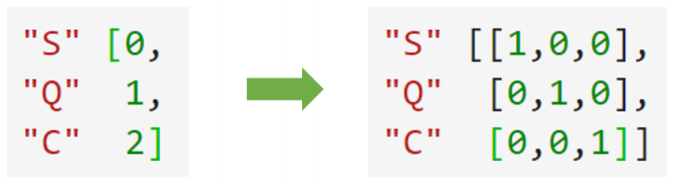

这样的变化，让算法能够彻底领悟，原来三个取值是没有可计算性质的，是“有你就没有我”的不等概念。在我们的数据中，性别和舱门，都是这样的名义变量。因此我们需要使用独热编码，将两个特征都转换为哑变量。

In [43]:
import pandas as pd
data = pd.read_csv("train.csv",index_col=0)
data = data[['Age','Sex','Embarked','Survived']]
data.reset_index(drop=True,inplace=True)
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 34.7+ KB


In [44]:
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [45]:
#依然可以直接一步到位,但为了给大家展示模型属性,所以还是写成了三步
#OneHotEncoder(categories='auto').fit_transform(X).toarray()

In [47]:
#依然可以还原
#pd.DataFrame(enc.inverse_transform(result))
enc.get_feature_names()   # 哑变量的特征是哪个
#result
#result.shape

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [48]:
#axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,1.0,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,1.0,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0


In [49]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


特征可以做哑变量,标签也可以,使用类sklearn.preprocessing.LabelBinarizer可做标签的哑变量,许多算法都可处理多标签的问题(决策树),但此做法不常见

---

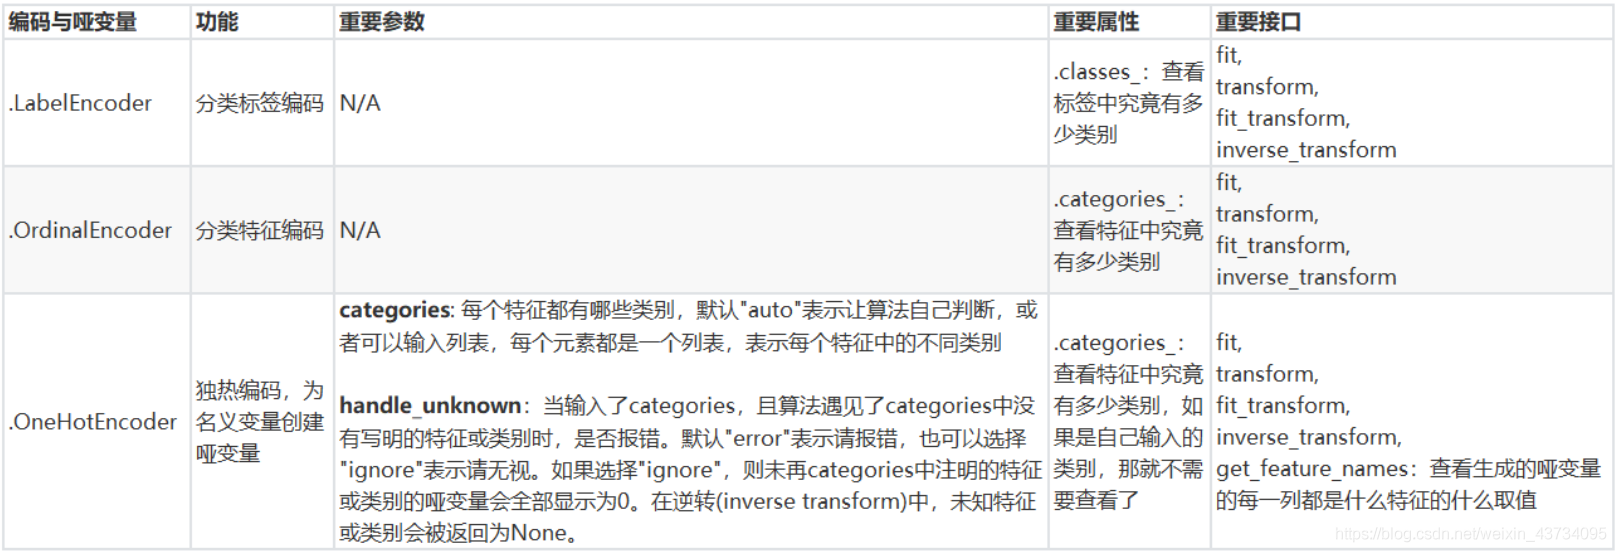

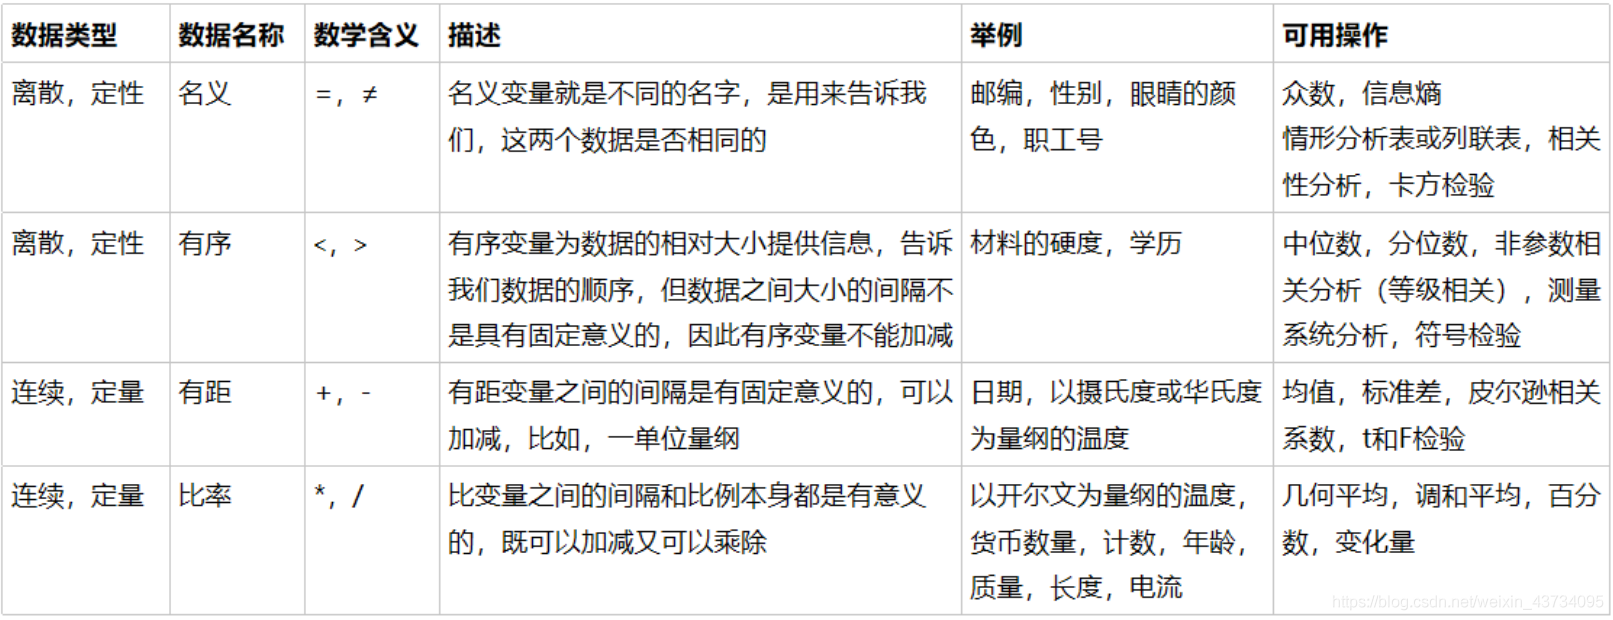

我们刚才已经用OrdinalEncoder把分类变量Sex和Embarked都转换成数字对应的类别了。在舱门Embarked这一列中，我们使用 [0,1,2] 代表了三个不同的舱门，然而这种转换是正确的吗？

我们来思考三种不同性质的分类数据：

1.舱门（S，C，Q）     
三种取值S，C，Q是相互独立的，彼此之间完全没有联系，表达的是 S≠C≠Q 的概念。这是**名义变量**    
2.学历（小学，初中，高中）      
三种取值不是完全独立的，我们可以明显看出，在性质上可以有高中>初中>小学这样的联系，学历有高低，但是学历取值之间却不是可以计算的，我们不能说小学 + 某个取值 = 初中。这是**有序变量**    
3.体重（>45kg，>90kg，>135kg）    
各个取值之间有联系，且是可以互相计算的，比如135kg - 45kg = 90kg，分类之间可以通过数学计算互相转换。这是**有距变量**。
